In [9]:
import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def connect():
  connection = sq.connect("..\..\FoodHub\db.sqlite3")
  cursor = connection.cursor()

  return connection, cursor

In [11]:
def get_users_profiles():
  _, cursor = connect()

  sql = "SELECT age, gender FROM accounts_user"

  cursor.execute(sql)

  users = cursor.fetchall()

  entries = []

  for age, gender in users:
    entries.append({
      "age": age,
      "gender": gender,
    })
  
  data = pd.DataFrame(entries)

  data["age"] = pd.to_numeric(data["age"])

  return data

In [12]:
data = get_users_profiles()

data.head()

,age,gender
0,24,male
1,20,female
2,40,male
3,70,male
4,25,male


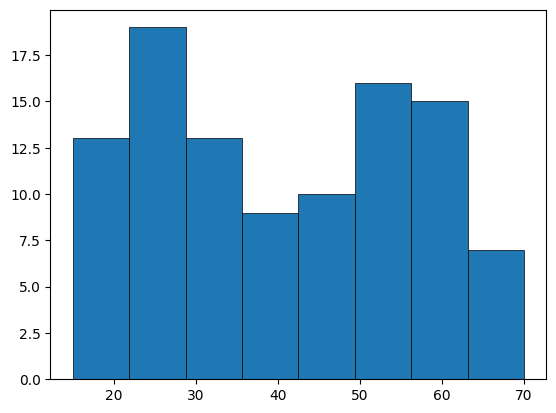

In [13]:
def show_users_by_age_hist():
  data["age"].hist(bins = 8, grid = False, edgecolor = "black", linewidth = 0.5)

show_users_by_age_hist()

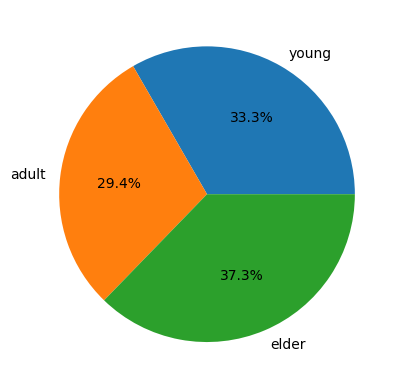

In [14]:
def show_users_by_gender_pie():
  age_class_labels = ["young", "adult", "elder"]

  age_class_count = [
    data[data["age"] < 30]["age"].count() / data["age"].count(),
    data[(data["age"] >= 30) & (data["age"] < 50)]["age"].count() / data["age"].count(),
    data[data["age"] >= 50]["age"].count() / data["age"].count(),
  ]

  plt.pie(age_class_count, labels = age_class_labels, autopct = "%1.1f%%")

show_users_by_gender_pie()

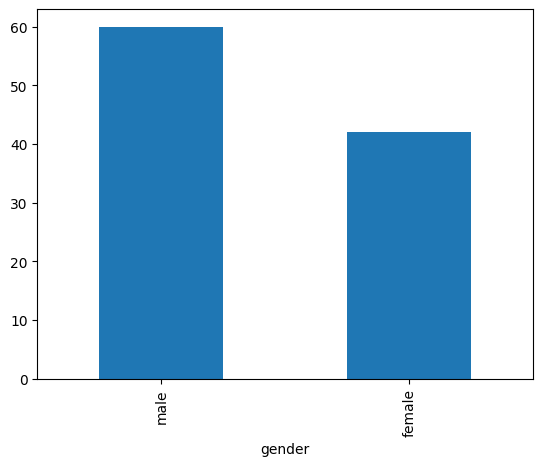

In [15]:
def show_users_by_gender_countplot():
  data["gender"].value_counts().plot(kind = "bar")

show_users_by_gender_countplot()

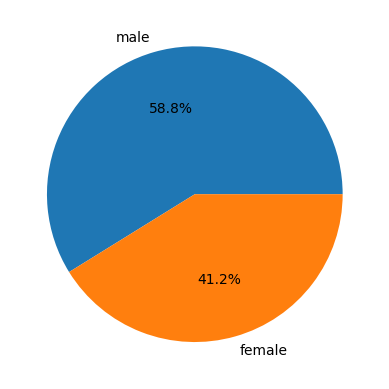

In [16]:
def show_users_by_gender_pie():
  counts = data["gender"].value_counts()
  labels = data["gender"].value_counts().index.tolist()

  plt.pie(counts, labels = labels, autopct = "%1.1f%%")

show_users_by_gender_pie()

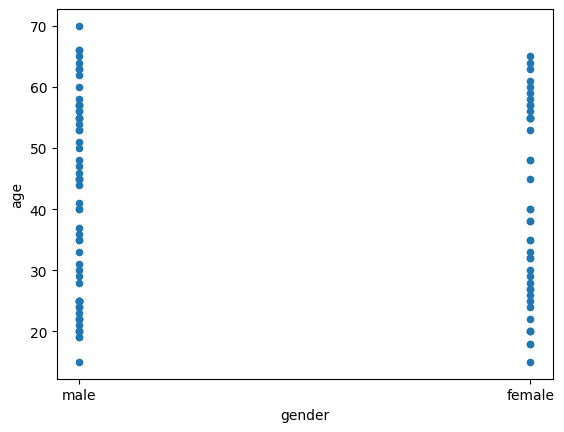

In [17]:
def show_user_profiles_scatter():
  data.plot(kind = "scatter", x = "gender", y = "age")

show_user_profiles_scatter()